# State Value Function

We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
![mdp.png](mdp.png)

# 6.1 Policy Evaluation by Dynamic Programming

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

policy=np.array([
    [0.3, 0.2, 0.5],
    [0.5, 0.4, 0.1],
    [0.8, 0.1, 0.1]
])
# 'raw_rewards' variable contains rewards obtained after transition to each state
# In our example it **doesn't depend on source state**
raw_rewards = np.array([1.5, -1.833333333, 19.833333333])
# 'rewards' variable contains expected values of the next reward for each state
rewards = np.matmul(policy, raw_rewards)
assert np.allclose(rewards, np.array([10., 2., 3.]))

state_value_function=np.array([0 for i in range(3)])

## Policy Evaluation Update with a Discount Rate of 0.1
discount_rate = 0.1
for i in range(20):
    print(state_value_function)
    
    ## state_value_function(s) = Expected[ reward(t+1) + discount_rate * state_value_function(S_t+1) ]
    state_value_function = np.matmul(policy, raw_rewards + discount_rate * state_value_function)
    
    ## or, after distributing the matrix multiplication:
    #state_value_function = np.matmul(policy, raw_rewards) + discount_rate * np.matmul(policy, state_value_function)

print(state_value_function)

[0 0 0]
[10.  2.  3.]
[10.49  2.61  3.85]
[10.5594  2.6674  3.9038]
[10.56532   2.673704  3.910464]
[10.56595688  2.6743188   3.91106728]
[10.56601845  2.67438127  3.91113041]
[10.5660247   2.67438748  3.91113659]
[10.56602532  2.6743881   3.91113722]
[10.56602538  2.67438816  3.91113728]
[10.56602539  2.67438817  3.91113728]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]


# 6.1 Policy Evaluation by Linear Programming

The state-value-function can be directly solved through linear programming (as shown on page 15):


In [3]:
## linear programming solution with a discount rate of 0.1
solution = np.identity(len(policy)) - discount_rate * policy
solution = np.matmul(np.linalg.inv(solution), rewards)
print(solution)

## iterative method is used in practise, because inverting large matrices is very costly

[10.56602539  2.67438817  3.91113729]


The result stays the same.

# 6.2 Monte Carlo Policy Evaluation


Monte Carlo Policy Evaluation can also be used, whereby sampling is used to get to the same result

In [4]:
import random
from collections import defaultdict
reward_counter=np.array([0., 0., 0.])
visit_counter=np.array([0., 0., 0.])

def gt(rewardlist, gamma=0.1):
    '''
    @arg rewardlist ordered sequence of rewards over time
            (from latest to oldest reward).
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    total_disc_reward = 0
    for i, val in enumerate(rewardlist):
        total_disc_reward += val * (gamma ** i)
    return total_disc_reward


for i in range(400):
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[]
    occurence=defaultdict(list) 
    for i in range(250):
        rewardlist.append(rewards[next_state]) 
        occurence[next_state].append(len(rewardlist)-1) 
        action=np.random.choice(np.arange(0, 3), p=policy[next_state]) 
        next_state=action

    for state in occurence: 
        for value in occurence[state]: 
            rew=gt(rewardlist[value:]) 
            reward_counter[state]+=rew 
            visit_counter[state]+=1 
            #break #if break: return following only the first visit

print(reward_counter/visit_counter)

[10.56246587  2.67484116  3.90810573]


As can be seen the result is nearly the same as the state-value-function calculated above.

# 6.2 Policy Optimization by Q-Learning

This code solves a very easy problem: using the rewards it calculated the optimal action-value-function.

It samples a state-action pair randomly, so that all state-action pairs can be seen.

In [13]:
learning_rate = 0.3 ## alpha
discount_rate = 0.1 ## gamma

q_table=np.zeros((3, 3)) 
for i in range(1001): 
    state = random.randint(0, 2)
    action = random.randint(0, 2)
    next_state = action
    reward = rewards[next_state]
    next_q = max(q_table[next_state])
    q_table[state, action] = \
        (1-learning_rate) * q_table[state, action] + \
        learning_rate * (reward + discount_rate * next_q)

    if i%100==0:
        print(q_table)

[[0. 0. 0.]
 [0. 0. 0.]
 [3. 0. 0.]]
[[10.97600208  2.92263198  3.96426944]
 [10.78256803  2.98500726  3.48072013]
 [10.21155555  3.0235425   3.83408455]]
[[11.10801684  3.10892408  4.09289861]
 [11.10301278  3.09645892  4.0727033 ]
 [11.00180969  3.10165937  4.08978797]]
[[11.11086157  3.11088791  4.1101248 ]
 [11.11103755  3.10934093  4.11062937]
 [11.10953583  3.11097289  4.10933876]]
[[11.11110889  3.11110644  4.11108524]
 [11.11110846  3.11105918  4.11102147]
 [11.1110943   3.1111089   4.11095225]]
[[11.11111087  3.11111103  4.11111045]
 [11.11111107  3.11111059  4.11110989]
 [11.1111101   3.11111099  4.1111014 ]]
[[11.11111111  3.11111111  4.11111107]
 [11.11111111  3.11111102  4.11111106]
 [11.1111111   3.11111111  4.11111106]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11

# 6.3 Score Function Gradient Estimator
Implement the score function gradient estimator in ```lxmls/reinforcement_learning/score_function_estimator.py```. Check it is correct by calling the train() function.

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
[0.3, 0.2, 0.2, 0.2, 1.0, 0.3, 0.2, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 0.2, 1.0, 1.0, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 1.0, 0.3, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3]


/Users/andre/Documents/lxmls-toolkit-student/lxmls/reinforcement_learning/score_function_estimator.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  poli = torch.nn.functional.softmax(model.t_policy).data.numpy()
/Users/andre/Documents/lxmls-toolkit-student/lxmls/reinforcement_learning/score_function_estimator.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  policy = torch.nn.functional.log_softmax(self.t_policy)


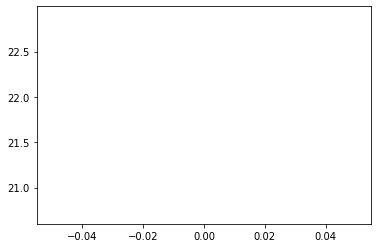

[[0.39651477 0.33830413 0.26518103]
 [0.4791321  0.26788703 0.25298092]
 [0.39718404 0.3388434  0.26397258]]
[1.0, 1.0, 0.2, 1.0, 0.3, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3, 0.2, 0.2, 0.3, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2]


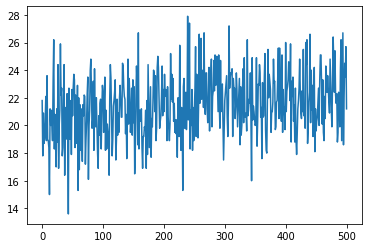

[[0.4209309  0.30416042 0.2749087 ]
 [0.5219239  0.2205969  0.25747916]
 [0.53328127 0.25762293 0.20909575]]
[0.3, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 1.0, 0.3, 0.2, 1.0, 1.0, 0.2, 1.0, 0.3, 0.2, 1.0, 0.2, 0.2, 1.0, 0.3, 0.2, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.3, 0.3, 1.0, 0.2, 1.0, 1.0]


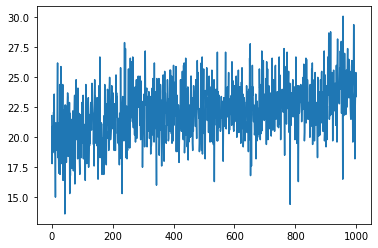

[[0.4299641  0.33013904 0.2398969 ]
 [0.5353139  0.23075148 0.23393461]
 [0.6538184  0.19125775 0.15492389]]
[0.3, 1.0, 0.2, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 0.3, 0.2, 1.0, 0.2, 0.3, 0.2, 1.0, 0.3, 1.0, 0.2, 0.2, 0.2, 0.2]


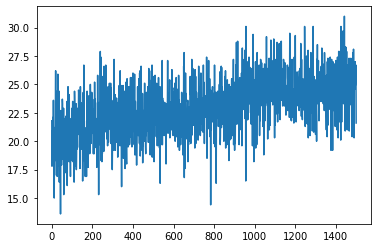

[[0.52778345 0.28809977 0.18411678]
 [0.5985941  0.21878234 0.1826236 ]
 [0.6295743  0.22167884 0.14874683]]
[0.2, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0]


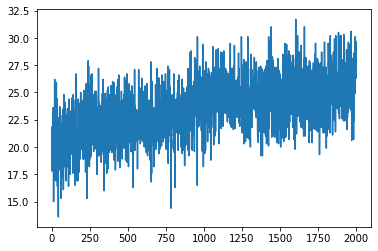

[[0.5402315  0.31920218 0.14056633]
 [0.68375105 0.18147592 0.13477299]
 [0.6011481  0.24388929 0.15496255]]
[1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 0.2, 0.3, 1.0, 0.3, 0.2, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 0.2]


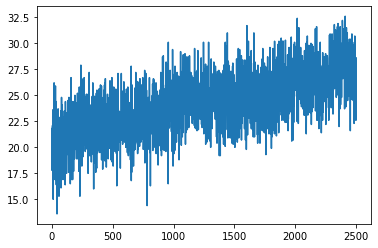

[[0.7977882  0.12952036 0.07269142]
 [0.7600392  0.14196761 0.0979932 ]
 [0.6825896  0.20674588 0.11066461]]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


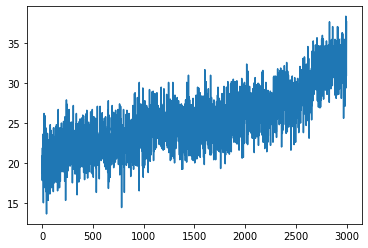

[[0.8154258  0.12236643 0.06220777]
 [0.7869197  0.12781073 0.08526959]
 [0.7010049  0.19264181 0.10635326]]
[1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0]


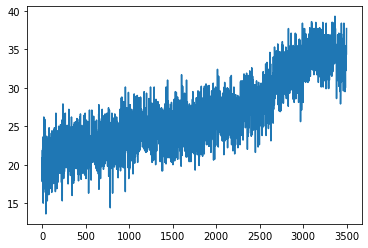

[[0.9102399  0.05922072 0.03053934]
 [0.8357179  0.09935118 0.06493094]
 [0.73115665 0.17158839 0.09725494]]
[0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0]


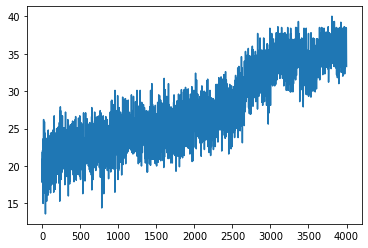

[[0.9288901  0.03746616 0.03364372]
 [0.84420717 0.0941173  0.06167544]
 [0.72368187 0.18103553 0.0952826 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


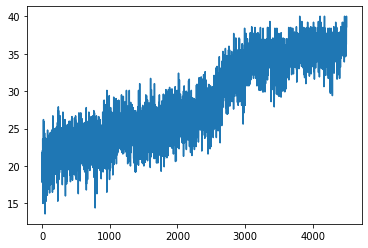

[[0.941077   0.03529293 0.02363008]
 [0.8426105  0.09314596 0.06424344]
 [0.70959467 0.19088241 0.09952296]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


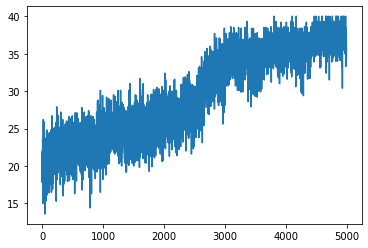

[[0.9463836  0.03578088 0.01783543]
 [0.81617653 0.10862473 0.07519869]
 [0.7390984  0.1658156  0.095086  ]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


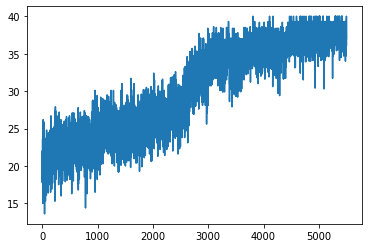

[[0.9764984  0.01467347 0.00882808]
 [0.8195366  0.10378406 0.07667933]
 [0.7224997  0.18206194 0.09543832]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


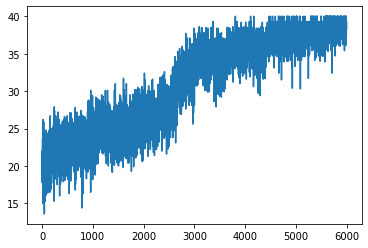

In [5]:
%matplotlib inline
from lxmls.reinforcement_learning.score_function_estimator import train
train()

# Value Iteration



In [27]:
import numpy as np

raw_rewards = np.array([10., 2., 3.])
gamma = 0.1

state_value_function = np.zeros(3)

for i in range(100):
    for s in range(3):
        ## state value function update:
        state_value_function[s] = max(
            raw_rewards[s_next] + gamma * state_value_function[s_next]
            for s_next in range(3)
        )
    if i % 10 == 0:
        print('V_{} = {}'.format(i + 1, state_value_function))

V_1 = [10. 11. 11.]
V_11 = [11.11111111 11.11111111 11.11111111]
V_21 = [11.11111111 11.11111111 11.11111111]
V_31 = [11.11111111 11.11111111 11.11111111]
V_41 = [11.11111111 11.11111111 11.11111111]
V_51 = [11.11111111 11.11111111 11.11111111]
V_61 = [11.11111111 11.11111111 11.11111111]
V_71 = [11.11111111 11.11111111 11.11111111]
V_81 = [11.11111111 11.11111111 11.11111111]
V_91 = [11.11111111 11.11111111 11.11111111]


# 6.4 Policy Gradient for the CartPole task
Implement policy gradient for the cartpole task by coding the forward pass of Model() in ```lxmls/reinforcement_learning/policy_gradient.py```. Check it is correct by calling the train() function.

env.action_space Discrete(2)
env.observation_space Box(4,)
env.observation_space.high [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
env.observation_space.low [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


/Users/andre/Documents/lxmls-toolkit-student/lxmls/reinforcement_learning/policy_gradient.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.linear2(x))


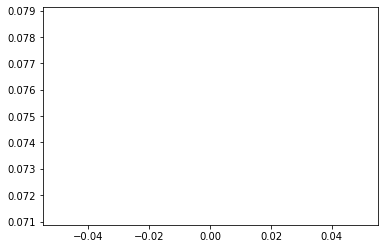

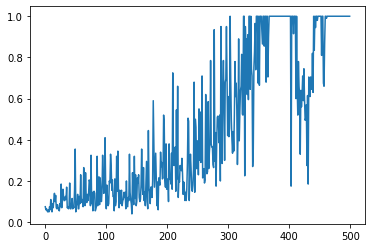

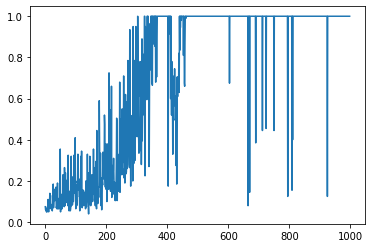

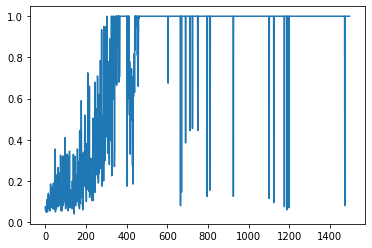

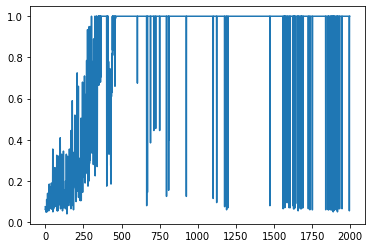

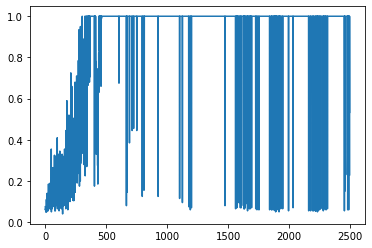

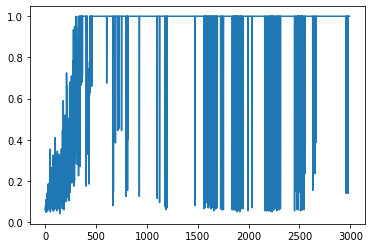

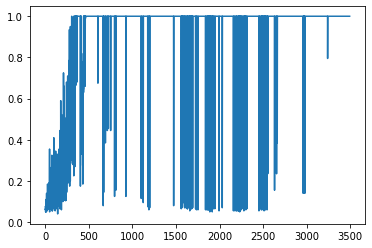

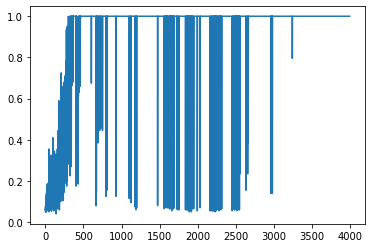

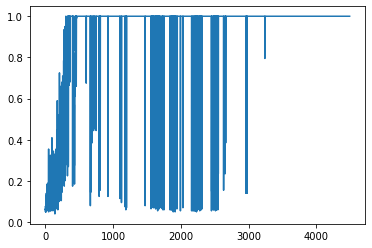

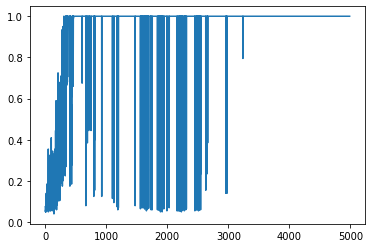

In [3]:
from lxmls.reinforcement_learning.policy_gradient import train
train()

# Extra: Actor Critic for the CartPole task
Implement actor critic for the cartpole task by coding the critic forward pass in ```lxmls/reinforcement_learning/actor_critic.py```. Check it is correct by calling the train() function.

/Users/andre/Documents/lxmls-toolkit-student/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/andre/Documents/lxmls-toolkit-student/lxmls/reinforcement_learning/actor_critic.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))


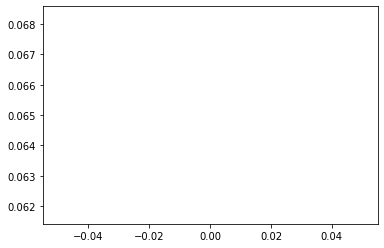

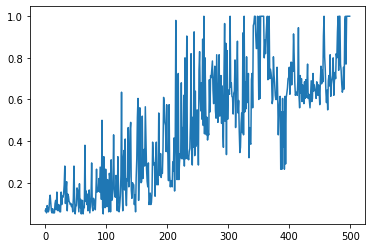

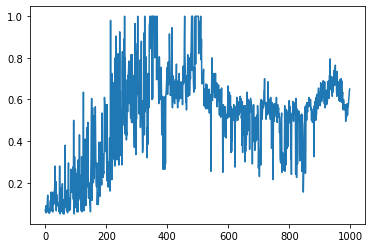

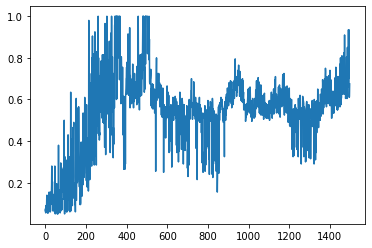

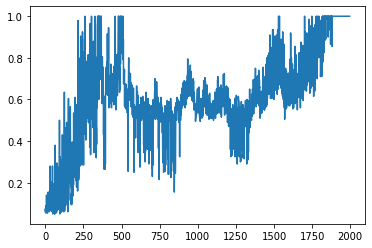

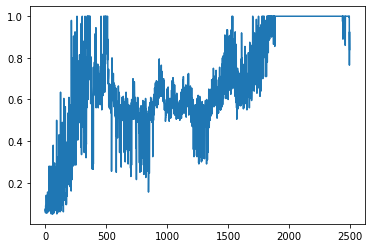

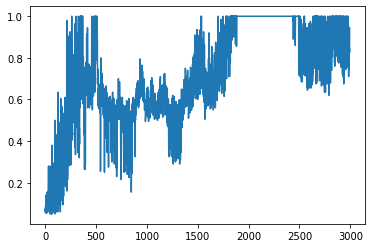

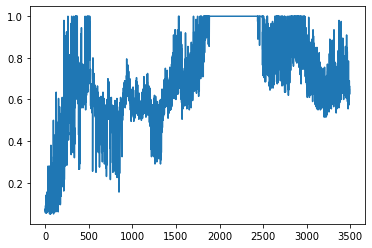

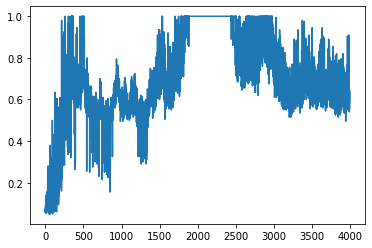

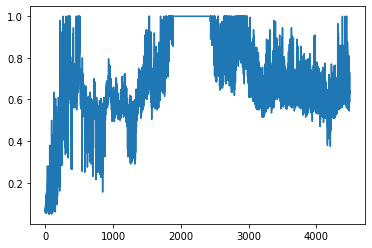

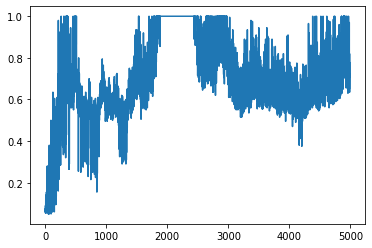

In [2]:
%matplotlib inline
from lxmls.reinforcement_learning.actor_critic import train
train()